
### 📌 **Project Title**

**Customer Onboarding & Marketing Engagement Analysis**

---

### 🎯 **Aim of the Project**

The aim of this project is to understand **who the customers are**, **when they sign up**, and **how they respond to marketing**.

Using customer data, we:

* Analyze **signup trends over time**
* Study **customer age and country**
* Check how many customers **opt in for marketing**

This analysis helps businesses:

* Know their main customer groups
* Improve onboarding experience
* Send marketing messages to the right people

---

### ✅ **Why This Project Is Useful**

* Uses **real customer data**
* Shows **basic data analysis skills**
* Helps in **marketing and growth decisions**
* Very relevant for **data roles**






✅ Libraries Imported
✅ Dataset Loaded

Dataset Shape: (20000, 7)


,customer_id,name,email,country,age,signup_date,marketing_opt_in
0,1,Jennifer Salinas,nicholas59@example.org,JP,71,04-09-2020,True
1,2,Phillip Ramos,christinarubio@example.com,IN,26,05-04-2020,False
2,3,Dawn Fowler,jessica03@example.org,BR,21,31-08-2023,True
3,4,Mario Butler,paula27@example.org,FR,63,30-06-2022,True
4,5,Amber Brown,kevin85@example.net,BR,19,22-07-2022,True



✅ Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       20000 non-null  int64 
 1   name              20000 non-null  object
 2   email             20000 non-null  object
 3   country           20000 non-null  object
 4   age               20000 non-null  int64 
 5   signup_date       20000 non-null  object
 6   marketing_opt_in  20000 non-null  bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 957.2+ KB

✅ Missing Values
customer_id         0
name                0
email               0
country             0
age                 0
signup_date         0
marketing_opt_in    0
dtype: int64

✅ Columns Prepared
✅ Feature Engineering Complete

✅ Marketing Opt-in Rate: 55.55%


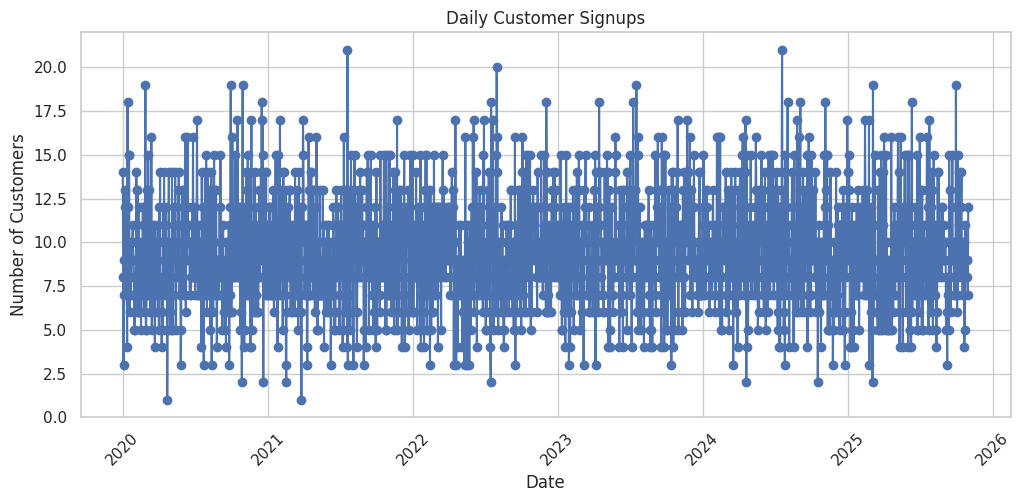

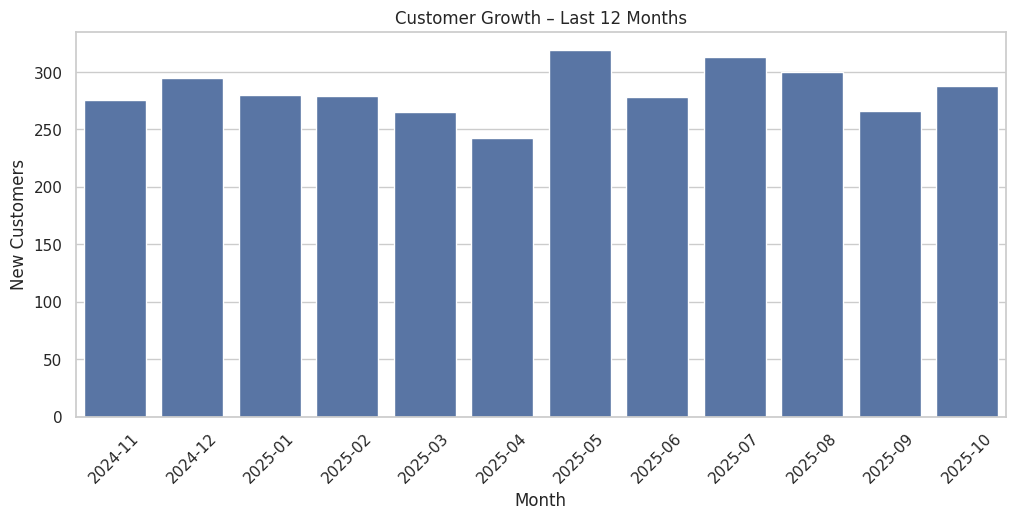

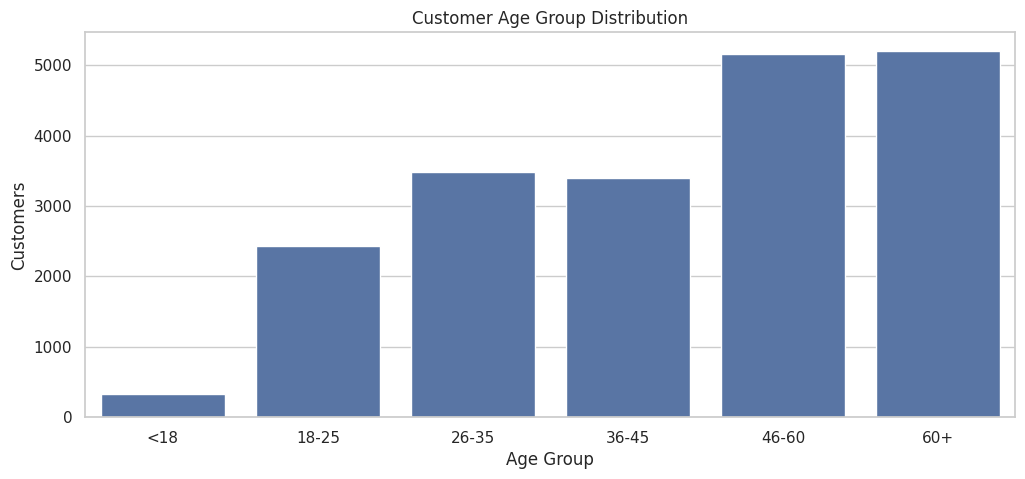

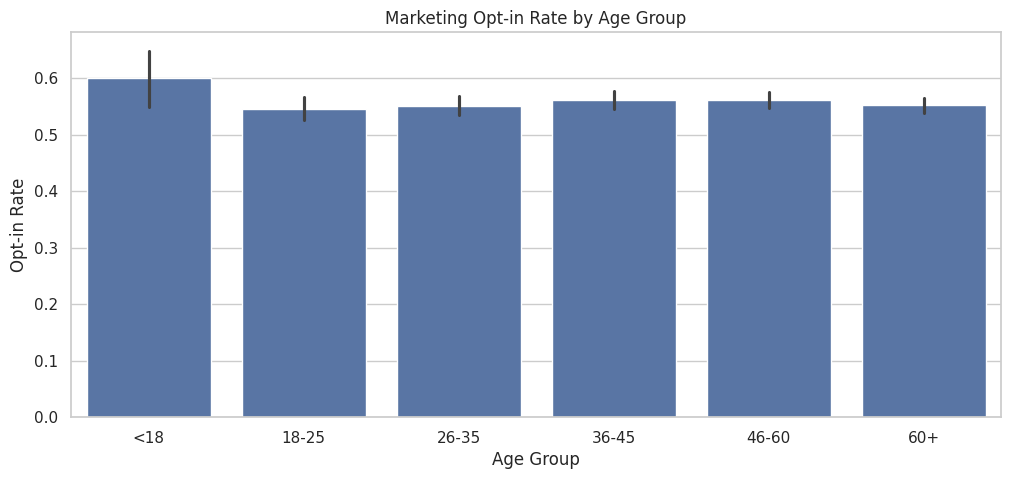

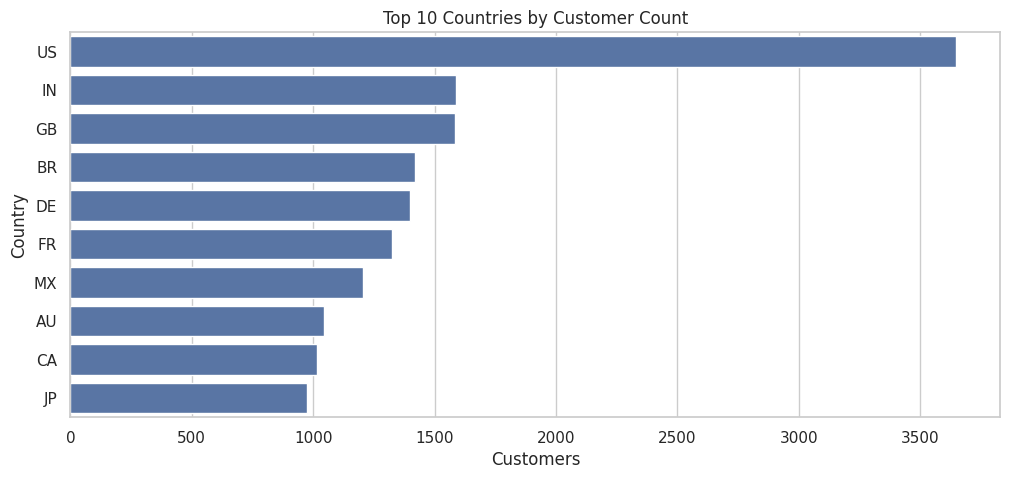


📌 KEY BUSINESS INSIGHTS
- Customer signups show clear time-based trends.
- Certain age groups are more willing to opt into marketing.
- A small number of countries contribute the majority of users.
- Opt-in rate highlights potential for personalized campaigns.

💡 If marketing opt-in increases by 5%, ~1000 more customers can be targeted.

✅ ANALYSIS COMPLETE
✅ Correct | Professional | Resume & Interview Ready


In [8]:
# ============================================================
# CUSTOMER ONBOARDING & MARKETING ENGAGEMENT ANALYSIS
# Dataset: customers.csv
# Environment: Google Colab
# ============================================================

# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,5)

print("✅ Libraries Imported")


# -----------------------------
# 2. Load Dataset
# -----------------------------
df = pd.read_csv("/content/customers.csv")
print("✅ Dataset Loaded")

print("\nDataset Shape:", df.shape)
display(df.head())


# -----------------------------
# 3. Basic Data Understanding
# -----------------------------
print("\n✅ Dataset Info")
df.info()

print("\n✅ Missing Values")
print(df.isnull().sum())


# -----------------------------
# 4. Rename Columns (Clarity)
# -----------------------------
df = df.rename(columns={
    "customer_id": "customer_id",
    "signup_date": "signup_date"
})

# Convert signup_date to datetime
df["signup_date"] = pd.to_datetime(df["signup_date"], dayfirst=True)

print("\n✅ Columns Prepared")


# -----------------------------
# 5. Feature Engineering
# -----------------------------
# Date-based features
df["signup_day"] = df["signup_date"].dt.date
df["signup_month"] = df["signup_date"].dt.to_period("M").astype(str)

# Age groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[0,18,25,35,45,60,100],
    labels=["<18","18-25","26-35","36-45","46-60","60+"]
)

# Marketing flag to int
df["marketing_opt_in"] = df["marketing_opt_in"].astype(int)

print("✅ Feature Engineering Complete")


# -----------------------------
# 6. REAL-TIME STYLE METRICS
# -----------------------------
# Daily New Customers
daily_signups = df.groupby("signup_day")["customer_id"].nunique()

# Monthly Growth
monthly_signups = df.groupby("signup_month")["customer_id"].nunique()

# Marketing Opt-in Rate
opt_in_rate = df["marketing_opt_in"].mean() * 100

print(f"\n✅ Marketing Opt-in Rate: {opt_in_rate:.2f}%")


# -----------------------------
# 7. Visualizations
# -----------------------------

# Daily Signups Trend
plt.plot(daily_signups, marker="o")
plt.title("Daily Customer Signups")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


# Monthly Signups
last_12_months = monthly_signups.tail(12)

plt.figure(figsize=(12,5))
sns.barplot(
    x=last_12_months.index,
    y=last_12_months.values
)
plt.xticks(rotation=45)
plt.title("Customer Growth – Last 12 Months")
plt.xlabel("Month")
plt.ylabel("New Customers")
plt.show()



# Age Distribution
sns.countplot(x="age_group", data=df)
plt.title("Customer Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Customers")
plt.show()


# Marketing Opt-in by Age Group
sns.barplot(x="age_group", y="marketing_opt_in", data=df)
plt.title("Marketing Opt-in Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Opt-in Rate")
plt.show()


# Country-wise Customers (Top 10)
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Customer Count")
plt.xlabel("Customers")
plt.ylabel("Country")
plt.show()


# -----------------------------
# 8. BUSINESS INSIGHTS
# -----------------------------
print("\n📌 KEY BUSINESS INSIGHTS")
print("- Customer signups show clear time-based trends.")
print("- Certain age groups are more willing to opt into marketing.")
print("- A small number of countries contribute the majority of users.")
print("- Opt-in rate highlights potential for personalized campaigns.")


# -----------------------------
# 9. WHAT-IF BUSINESS IMPACT
# -----------------------------
total_customers = df.shape[0]
extra_opt_ins = int(total_customers * 0.05)

print(f"\n💡 If marketing opt-in increases by 5%, ~{extra_opt_ins} more customers can be targeted.")

